In [155]:
# Dependencies and Setup

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [156]:
#create variable for data file
clean_data = "Clean_Resources/Master_NC_Dataframe_2020.csv"

#read in data file
clean_data= pd.read_csv(clean_data)

#display data
clean_data.head()

,County,year,Active Dentists,Active Primary Care Physicians,Beds in General Hospitals,Deaths by Injury or Violence,Divorces,General Hospital Discharges,Infant Deaths,Low-Weight Births Under 2500 Grams,Marriages,Midlevel Practitioners,Nongeriatric Deaths,Nursing Facility Beds,Persons Served in Area Mental Health Programs,Pregnancies for Females 15-19,Pregnancies for Females of All Ages,Registered Nurses,Reported Abortions,Resident Deaths,Resident Live Births,"Total Active Physicians, Nonfederal, Non-resident-in-tr",Am. Indian Alaska Native Median Household Income,Am. Indian Alaska Native Per Capita Money Income (Census),Am. Indian Alaska Native Persons in Poverty,Am. Indian Alaska Native Population for Whom Poverty Is Determined,Annual Wages by Place of Work,Average Annual Employment by Place of Work,Average Annual Wage per Worker,Black Median Household Income,Black Persons for Whom Poverty Status Is Determined,Black Persons in Poverty,Black Unemployment Rate (ACS),Employed Females Age 16 Up,Employed Males Age 16 Up,Employment by Place of Residence,Estimated Median Family Income(HUD),Families in Poverty,Families in Poverty with Female Householder,Families in Poverty with Related Children,Families in Poverty/Female Householder & Children,"Families with Income $10,000-14,999","Families with Income $15,000-24,999","Families with Income $25,000-49,999","Families with Income $50,000 or More",Female Unemployment Rate (ACS),Females Age 16 Up in Labor Force,First Quarter Payroll by Place of Work,Hispanic Median Household Income,Hispanic Persons in Poverty,Hispanic Population for Whom Poverty is Determined,Labor Force by Place of Residence,Male Unemployment Rate (ACS),Males Age 16 Up in Labor Force,Manufacturing Employment by Place of Work,Manufacturing Employment for Residents Age 16 Up,Mean Family Income,Median Family Income,Median Female Income,Median Household Income_x,Median Income,Median Male Income,Nonagric. Wage & Salary Employment by Place of Work,Nonmanuf. Employment for Residents Age 16 Up,Nonmanufacturing Employment by Place of Work,Per Capita Money Income (Census),Percent of White Persons in Poverty,Percent of Am. Indian Alaska Native Persons in Poverty,Percent of Black Persons in Poverty,Percent of Hispanic Persons in Poverty,Percent of Persons 65 Up in Poverty,Percent of Persons in Poverty,Percent of Related Children under 18 in Poverty,Percent of Related Children under 6 in Poverty,Persons 65 Up for Whom Poverty Status Is Determined,Persons 65 Up in Poverty,Persons for Whom Poverty Status Is Determined,Persons in Poverty,Related Children under 18 in Poverty,Related Children under 18-Poverty Status Determined,Related Children under 6 in Poverty,Related Children under 6-Poverty Status Determined,Unemployed Females Age 16 Up,Unemployed Males Age 16 Up,Unemployment Rate (ACS),Unemployment Rate by Place of Residence (Percent),Unemployment by Place of Residence,White Persons for Whom Poverty Status Is Determined,White Persons in Poverty,Female-Other-Population Age 0-4,Female-Other-Population Age 5,Female-Other-Population Age 6-9,Female-Other-Population Age 10-12,Female-Other-Population Age 13,Female-Other-Population Age 14,Female-Other-Population Age 15,Female-Other-Population Age 16-17,Female-Other-Population Age 18,Female-Other-Population Age 19,Female-Other-Population Age 20-24,Female-Other-Population Age 25-29,Female-Other-Population Age 30-34,Female-Other-Population Age 35-39,Female-Other-Population Age 40-44,Female-Other-Population Age 45-49,Female-Other-Population Age 50-54,Female-Other-Population Age 55-59,Female-Other-Population Age 60-64,Female-Other-Population Age 65-69,Female-Other-Population Age 70-74,Female-Other-Population Age 75-79,Female-Other-Population Age 80-84,Female-Other-Population Age 85 and Over,Female-White-Population Age 0-4,Female-White-Population Age 5,Female-White-Population Age 6-9,Female-White-Population Age 10-12,Female-White-Population Age 13,Female-White-Population Age 14,Female-White-Populat

In [157]:
# create dataframe with interested initial data 
small_data= pd.DataFrame({
    'County': clean_data['County'],
    'Percent of Persons in Poverty': clean_data['Percent of Persons in Poverty'],
    'Population Density (Persons per Square Mile)': clean_data['Population Density (Persons per Square Mile)'],
    'Resident Live Births': clean_data['Resident Live Births'],
    'Mean Family Income': clean_data['Mean Family Income'],
    'death_per_1000_infant_death': clean_data['death_per_1000_infant_death'],
    'Infant Deaths': clean_data['Infant Deaths'],
    'Pregnancies for Females of All Ages': clean_data['Pregnancies for Females of All Ages'],
    'Population (Census/Estimate/Projection)': clean_data['Population (Census/Estimate/Projection)'], 
    'Population Density (Persons per Square Mile)': clean_data['Population Density (Persons per Square Mile)']
})

small_data.head()

,County,Percent of Persons in Poverty,Population Density (Persons per Square Mile),Resident Live Births,Mean Family Income,death_per_1000_infant_death,Infant Deaths,Pregnancies for Females of All Ages,Population (Census/Estimate/Projection)
0,Alamance County,15.42,394.75,1831.0,83335.0,0.064172,11.0,2270.0,171415.0
1,Alexander County,12.30,138.24,346.0,81515.0,0.027439,1.0,377.0,36444.0
2,Alleghany County,22.61,46.08,96.0,69940.0,0.000000,0.0,106.0,10888.0
3,Anson County,18.77,41.06,278.0,64011.0,0.226706,5.0,348.0,22055.0
4,Ashe County,14.83,61.90,233.0,64186.0,0.075253,2.0,242.0,26577.0


In [158]:
#Sorting the data by infant death per 1000
infant_death_per_1000 = pd.DataFrame(clean_data, columns=['County', 'death_per_1000_infant_death'])
infant_death_per_1000 = infant_death_per_1000.sort_values(by=['death_per_1000_infant_death'], ascending=False)
#print(infant_death_per_1000.head(150))
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(infant_death_per_1000)

                 County  death_per_1000_infant_death
3          Anson County                     0.226706
92        Warren County                     0.214569
76      Richmond County                     0.209566
45      Hertford County                     0.185598
30        Duplin County                     0.184748
73          Pitt County                     0.182093
57        Martin County                     0.181562
82      Scotland County                     0.175572
65   Northampton County                     0.171713
7         Bertie County                     0.167280
46          Hoke County                     0.153604
25    Cumberland County                     0.149375
32     Edgecombe County                     0.143149
29         Davie County                     0.140476
8         Bladen County                     0.135108
6       Beaufort County                     0.134372
98        Yadkin County                     0.134358
35        Gaston County                     0.

In [159]:
#Sorting the data by infant death per 1000
infant_death_per_1000 = pd.DataFrame(clean_data, columns=['County', 'death_per_1000_infant_death', 'Population (Census/Estimate/Projection)', 'Population Density (Persons per Square Mile)'])
infant_death_per_1000 = infant_death_per_1000.sort_values(by=['death_per_1000_infant_death'], ascending=False)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(infant_death_per_1000)

                 County  death_per_1000_infant_death  \
3          Anson County                     0.226706   
92        Warren County                     0.214569   
76      Richmond County                     0.209566   
45      Hertford County                     0.185598   
30        Duplin County                     0.184748   
73          Pitt County                     0.182093   
57        Martin County                     0.181562   
82      Scotland County                     0.175572   
65   Northampton County                     0.171713   
7         Bertie County                     0.167280   
46          Hoke County                     0.153604   
25    Cumberland County                     0.149375   
32     Edgecombe County                     0.143149   
29         Davie County                     0.140476   
8         Bladen County                     0.135108   
6       Beaufort County                     0.134372   
98        Yadkin County                     0.13

In [160]:
#Bin infant_deaths_per_1000
#Define bin labels
bin_df = infant_death_per_1000.copy()
#bin_labels = [0, '0.001-0.039', '0.039 - 0.059', '0.059 - 0.079', '0.079 - 0.099', '0.099 - 0.119', '0.119 - 0.139', '0.139 - 0.159', '0.159 - 0.179', '0.179 - 0.199', '0.199 - 0.219', '0.219 - 0.239']
bin_labels = ['0', '.02', '.04', '.06', '.08', '.10', '.12', '.14', '.16', '.18', '.20', '.22', '.24']
#Create bins
#bins= [0, .019, .039, .059, .079, .099, .119, .139, .159, .179, .199, .219, .239]
bins= [0, 0.0001, .02, .04, .06, .08, .10, .12, .14, .16, .18, .20, .22, .24]
#Create new column infant_deaths_per_1000_bin
bin_df['death_per_1000_infant_death'] = pd.cut(bin_df['death_per_1000_infant_death'], bins=bins, labels=bin_labels)
#Check new column
bin_df.head()

,County,death_per_1000_infant_death,Population (Census/Estimate/Projection),Population Density (Persons per Square Mile)
3,Anson County,.24,22055.0,41.06
92,Warren County,.22,18642.0,41.96
76,Richmond County,.22,42946.0,89.53
45,Hertford County,.20,21552.0,59.80
30,Duplin County,.20,48715.0,59.39


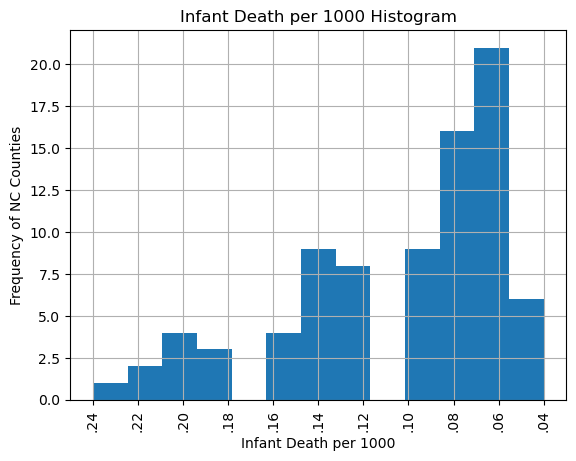

In [161]:
#######Why won't the bin with zero print???? ##### How to get the least bin to print on the left side of the histogram?
#infant_death_per_1000 histogram with 13 bins
bin_df["death_per_1000_infant_death"].hist(bins=13)
plt.xticks(rotation=90)
plt.xlabel("Infant Death per 1000")
plt.ylabel("Frequency of NC Counties")
plt.title("Infant Death per 1000 Histogram")
plt.show()

In [162]:
### How to get the county and headers to print????????
# find percent of infant deaths in each NC county (infant deaths/ (pregnancy number-abortions)) 
pct_infant_deaths = pd.DataFrame(small_data)
pct_infant_deaths= pct_infant_deaths["Infant Deaths"]/ pct_infant_deaths["Pregnancies for Females of All Ages"]
pct_infant_deaths = pd.DataFrame({'County': small_data['County'], '% Infant Deaths': pct_infant_deaths})
pct_infant_deaths['% Infant Deaths'] = pct_infant_deaths['% Infant Deaths'].map(lambda x: x*100)
pct_infant_deaths = pct_infant_deaths.sort_values(by=['% Infant Deaths'], ascending=False)
#Sorting the data by infant death per total of live births and infant deaths
#pct_infant_deaths = pct_infant_deaths.sort_values(by=['death_per_1000_infant_death'], ascending=False)

#pct_infant_deaths.head()
print(pct_infant_deaths)

                 County  % Infant Deaths
92        Warren County         1.818182
45      Hertford County         1.652893
57        Martin County         1.532567
3          Anson County         1.436782
82      Scotland County         1.415094
65   Northampton County         1.388889
29         Davie County         1.388889
7         Bertie County         1.363636
76      Richmond County         1.285714
98        Yadkin County         1.243781
6       Beaufort County         1.237113
73          Pitt County         1.236538
84        Stokes County         1.162791
30        Duplin County         1.123596
18       Chatham County         1.106501
8         Bladen County         0.977995
61    Montgomery County         0.974026
69    Pasquotank County         0.968992
68       Pamlico County         0.961538
35        Gaston County         0.954261
71    Perquimans County         0.925926
32     Edgecombe County         0.924703
34      Franklin County         0.888889
52           Lee

In [163]:
# 3 variables or df (sorted, top counties, bottom counties)
# create sorted df (template- pct_infant_deaths = pct_infant_deaths.sort_values(by=['% Infant Deaths'], ascending=False))
# create top 17 df (.head(17) to the end of the sorted df)
# create bottom 17 df (.tail(17) to the end of the sorted df)
# summary stats (groupby aggregations)

#plt.bar 2 bar charts in one cell (both will be in output)


In [164]:
# display bar graph of the median family income for each NC county

In [165]:
# display bar graph of the % of familys in poverty for each NC county


In [166]:
# generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the % of ......

In [167]:
# create a scatter plot with correlation and regression of ....

In [168]:
# generate a box plot that shows the distribution of .....
